# Density based clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

quant = pd.read_csv("ravdess_quantitative.csv")
categ = pd.read_csv("ravdess_categorical.csv")

First, a normalization is needed.

In [2]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(quant.values)

It is necessary to embed the dataset in a lower-dimensional space. I choose to use ISOMAP

In [3]:
from sklearn.manifold import Isomap
isomap = Isomap(n_neighbors=5, n_components=2, p=1)
S = isomap.fit_transform(X)

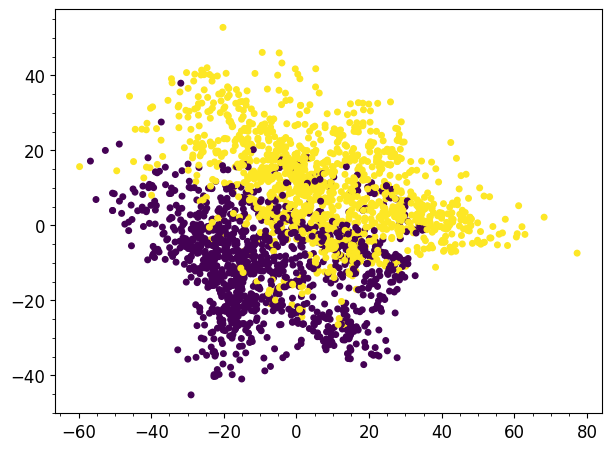

In [4]:
plt.scatter(S[:,0], S[:,1], c=pd.Categorical(categ.sex).codes )

## DBSCAN

DBSCAN:
	number of custers = 0
	outliers 2452


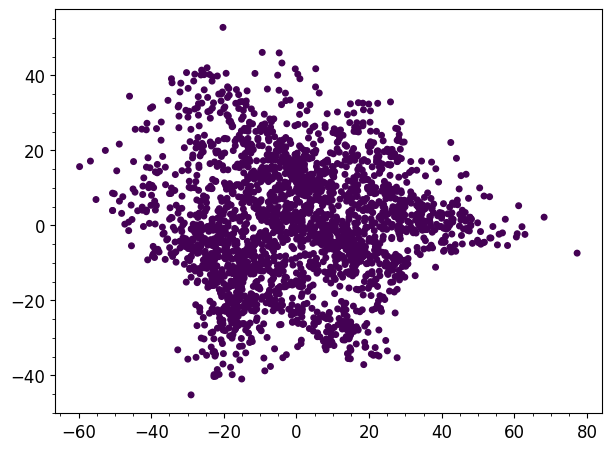

In [5]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=0.029, min_samples=5).fit(X)
n_clusters_ = len(set(cluster.labels_)) - (1 if -1 in cluster.labels_ else 0)
n_noise_ = list(cluster.labels_).count(-1)

print(f"DBSCAN:\n\tnumber of custers = {n_clusters_}\n\toutliers {n_noise_}")
plt.scatter(S[:,0],S[:,1], c=cluster.labels_)

This is really sensitive to eps value, i try a raster scan

Max number of clusters (0.0) for eps = 0.01


Text(0, 0.5, 'number of clusters')

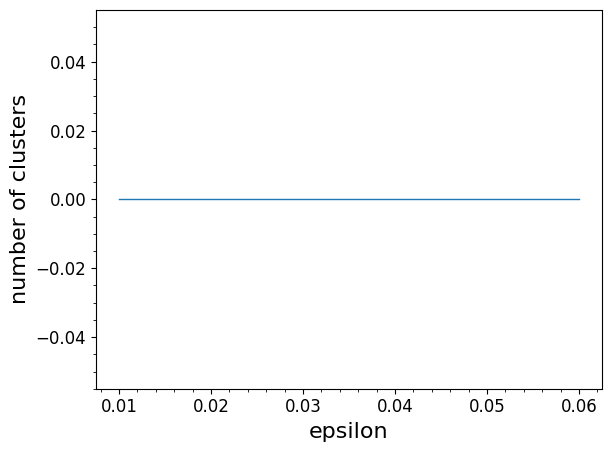

In [6]:
N=20
n = np.zeros(N)
epsilons = np.linspace(0.01, 0.06, N)
for i, eps in enumerate(epsilons):
    cluster = DBSCAN(eps=eps, min_samples=10).fit(X)
    n[i] = len(set(cluster.labels_)) - (1 if -1 in cluster.labels_ else 0)
print(f"Max number of clusters ({max(n)}) for eps = {epsilons[np.argmax(n)]}")
plt.step(epsilons, n)
plt.xlabel("epsilon")
plt.ylabel("number of clusters")

## OPTICS

Max number of clusters (1.0) for eps = 0.1


Text(0, 0.5, 'number of clusters')

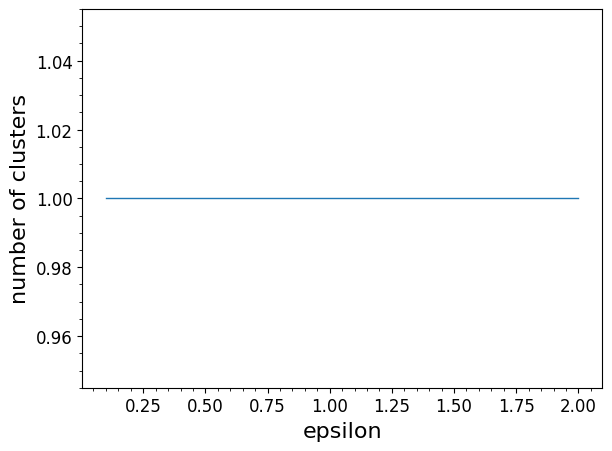

In [8]:
from sklearn.cluster import OPTICS

N=5
n = np.zeros(N)
epsilons = np.linspace(0.1, 2.0, N)
for i, eps in enumerate(epsilons):
    cluster = OPTICS(eps=eps, min_samples=10).fit(X)
    n[i] = len(set(cluster.labels_)) - (1 if -1 in cluster.labels_ else 0)
print(f"Max number of clusters ({max(n)}) for eps = {epsilons[np.argmax(n)]}")
plt.step(epsilons, n)
plt.xlabel("epsilon")
plt.ylabel("number of clusters")

OPTICS:
	number of custers = 7
	outliers 2237


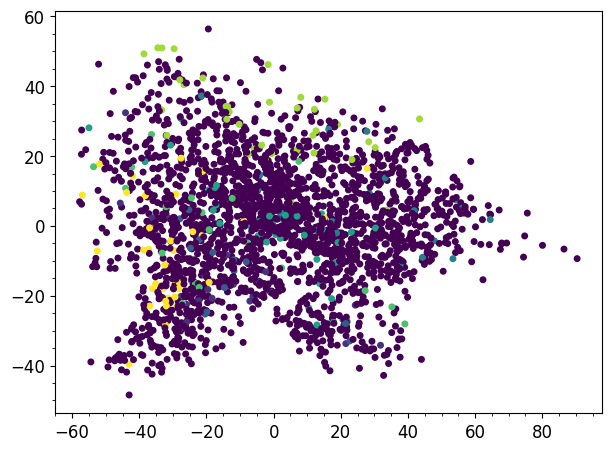

In [ ]:
cluster = OPTICS(eps=1.0, min_samples=20).fit(X)
n_clusters_ = len(set(cluster.labels_)) - (1 if -1 in cluster.labels_ else 0)
n_noise_ = list(cluster.labels_).count(-1)

print(f"OPTICS:\n\tnumber of custers = {n_clusters_}\n\toutliers {n_noise_}")
plt.scatter(S[:,0],S[:,1], c=cluster.labels_)
